## Model Selection

- Cross validation
- Bias-Variance Trade-Off
- Regularization
    - Ridge
    - Lasso
    

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
colors = plt.rcParams['axes.color_cycle']

In [2]:
from sklearn import datasets
from sklearn.datasets.samples_generator import make_regression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

### Sample data

In [3]:
X, y = make_regression( n_samples=60, n_features=1, n_informative=1,
                        random_state=0, noise=20) 
X = X + 5
y = y + 300

In [4]:
def plot():
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    fig.show()

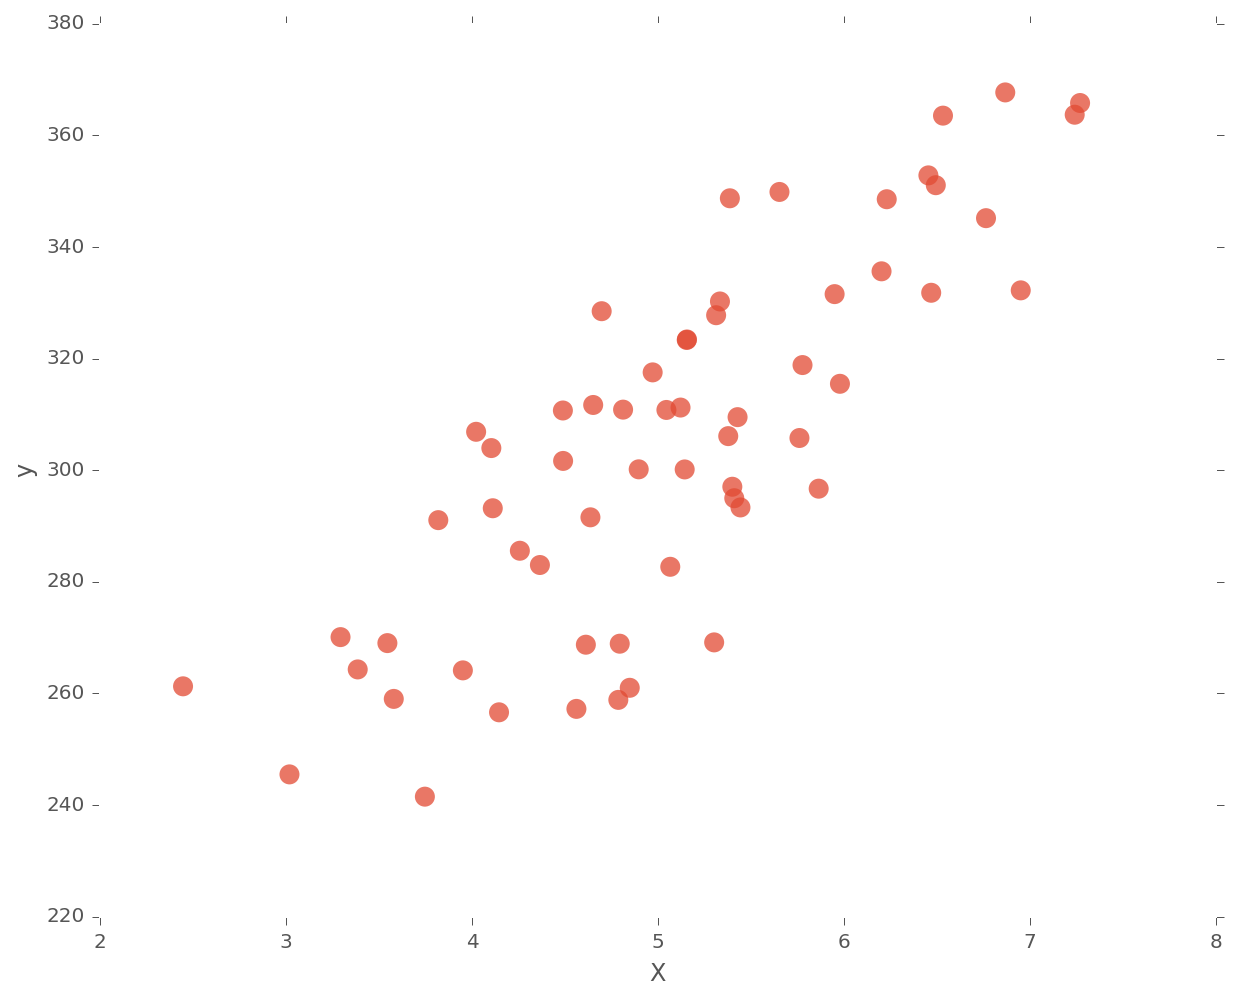

In [6]:
plot()

In [7]:
regr = LinearRegression()
regr.fit(X, y)
print regr.score(X,y)

0.659251562827


In [8]:
regr_nn = KNeighborsRegressor(1)
regr_nn.fit(X, y)
print regr_nn.score(X,y)

1.0


### What's going on?

- `KNeighborsRegressor(1)`: we are just memorizing the data
- We are likely **overfitting** to the data.
    - Not likely to perform well on data we have not seen.
- Solution: **cross validate**

In [9]:
def plot():
    fig, ax = plt.subplots()
    ax.scatter(X[:,0], y, edgecolor='none', s=100, alpha=0.75, c=colors[0])
    ax.plot(sorted(X[:,0]), regr_nn.predict(X[np.argsort(X[:,0])]), linewidth=2)
    ax.plot(X[:,0], regr.predict(X), linewidth=2)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    fig.show()

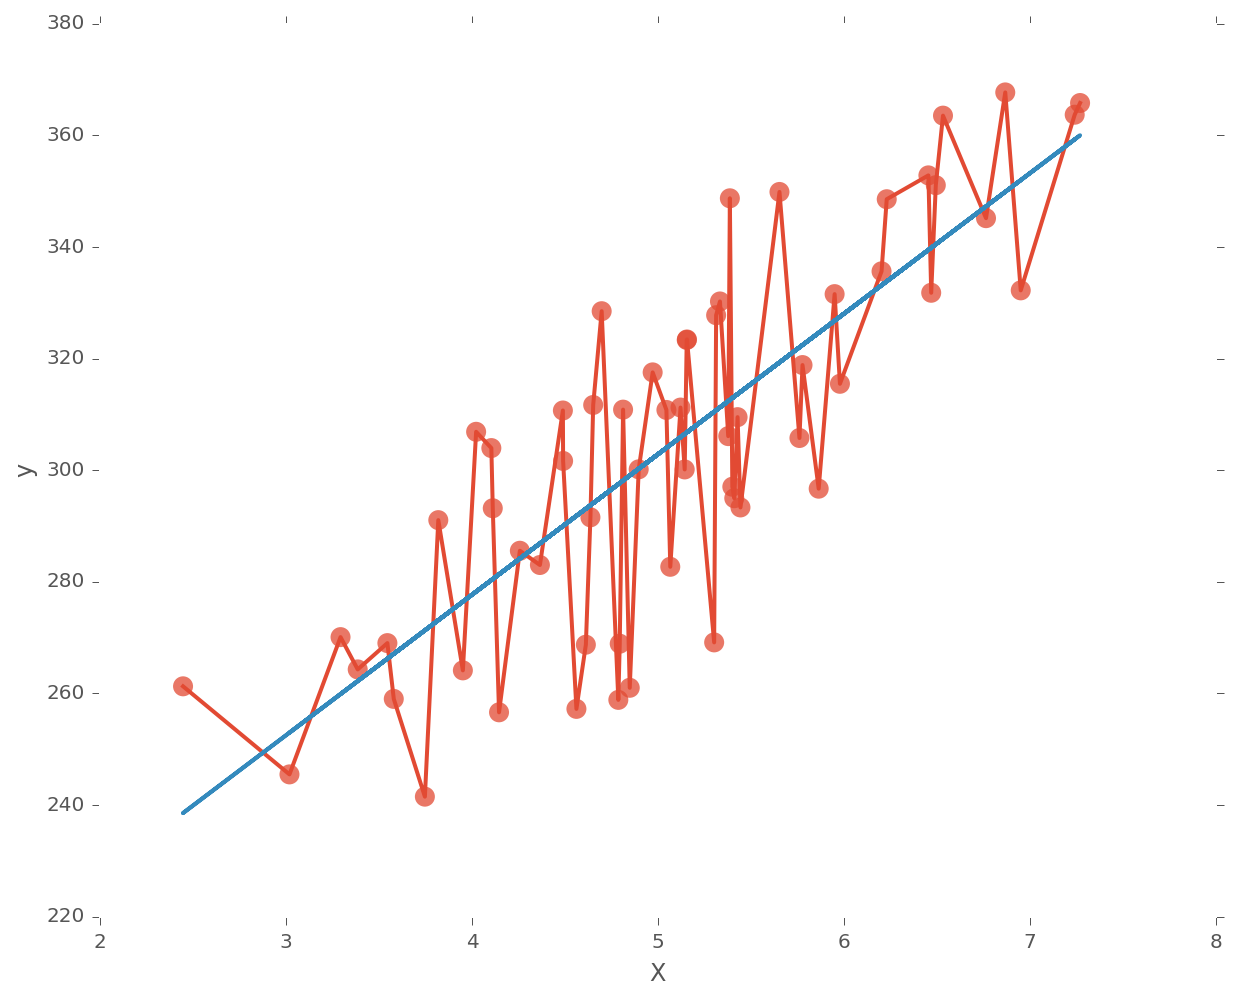

In [10]:
plot()

### Cross Validation

In [11]:
from sklearn import cross_validation

X, y = make_regression( n_samples=60, n_features=1, n_informative=1,
                        random_state=0, noise=10) 
X = X + 5
y = y + 300

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                        test_size=0.2, random_state=0)

print X.shape, X_train.shape, X_test.shape

def plot():
    fig, ax = plt.subplots()
    ax.scatter(X_train[:,0], y_train, edgecolor='none', 
               s=100, alpha=0.5, c=colors[0], label='train')
    ax.scatter(X_test[:,0], y_test, edgecolor='none', 
               s=100, alpha=1., c=colors[1], label='test')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    fig.show()

(60, 1) (48, 1) (12, 1)


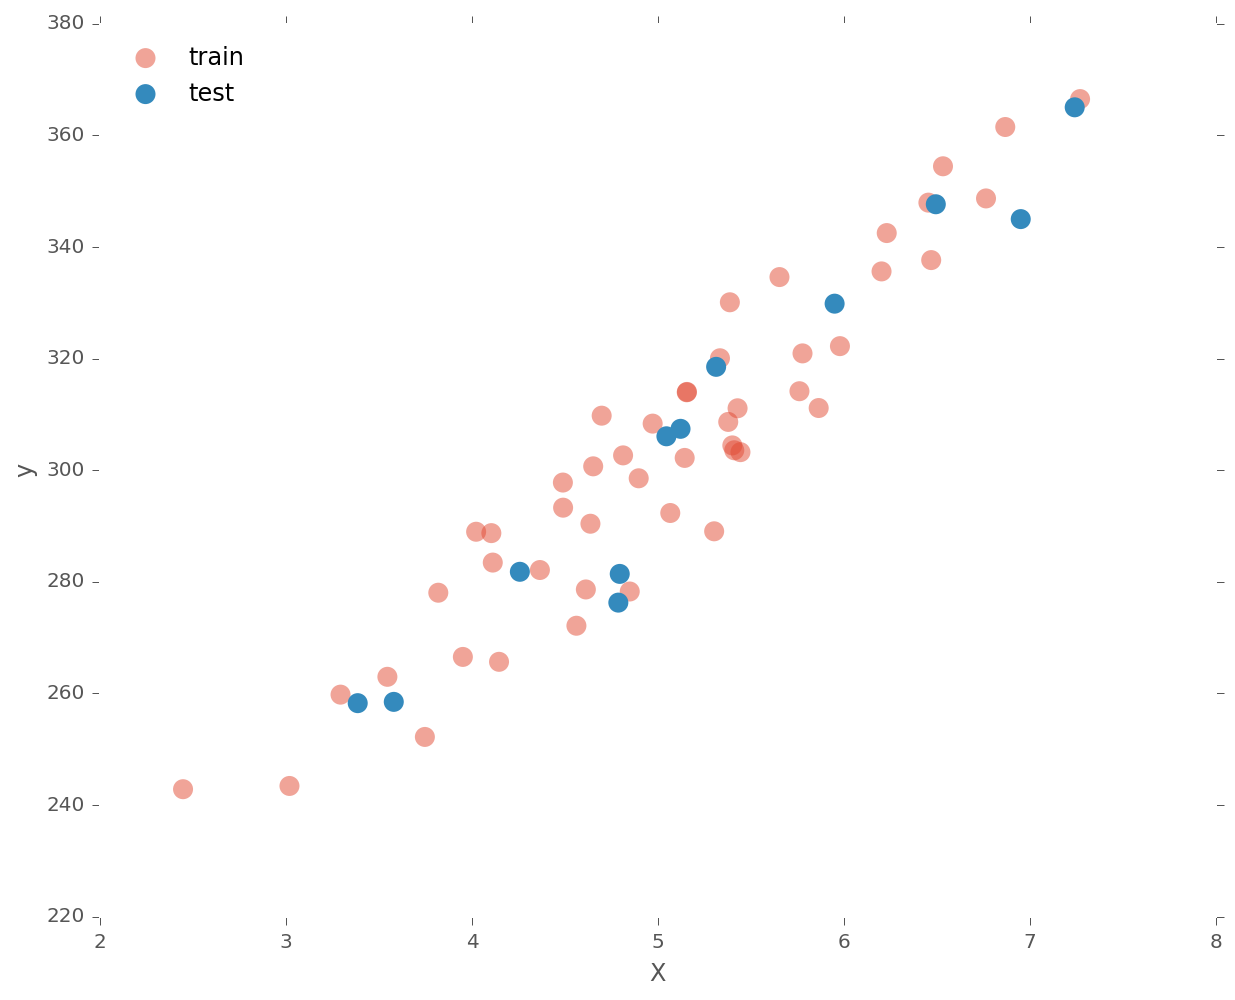

In [12]:
plot()

In [13]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print regr.score(X_train, y_train)
print regr.score(X_test, y_test)

0.888219653513
0.939492295451


In [14]:
regr_nn = KNeighborsRegressor(1)
regr_nn.fit(X_train, y_train)
print regr_nn.score(X_train, y_train)
print regr_nn.score(X_test, y_test)

1.0
0.809129476496


In [15]:
regr_nn = KNeighborsRegressor(2)
regr_nn.fit(X_train, y_train)
print regr_nn.score(X_train, y_train)
print regr_nn.score(X_test, y_test)

0.937726017289
0.938673349488


In [16]:
def plot():
    X = X_train
    y = y_train
    fig, ax = plt.subplots()
    ax.scatter(X_test[:,0], y_test, edgecolor='none', 
               s=100, alpha=1, c=colors[1], label='test points')
    ax.plot(sorted(X[:,0]), regr_nn.predict(X[np.argsort(X[:,0])]), 
            linewidth=2, label='KNeighborsRegressor(2)', color=colors[2])
    ax.plot(X[:,0], regr.predict(X), linewidth=2, 
            label='LinearRegression()', color=colors[3])
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend(loc='upper left')
    fig.show()

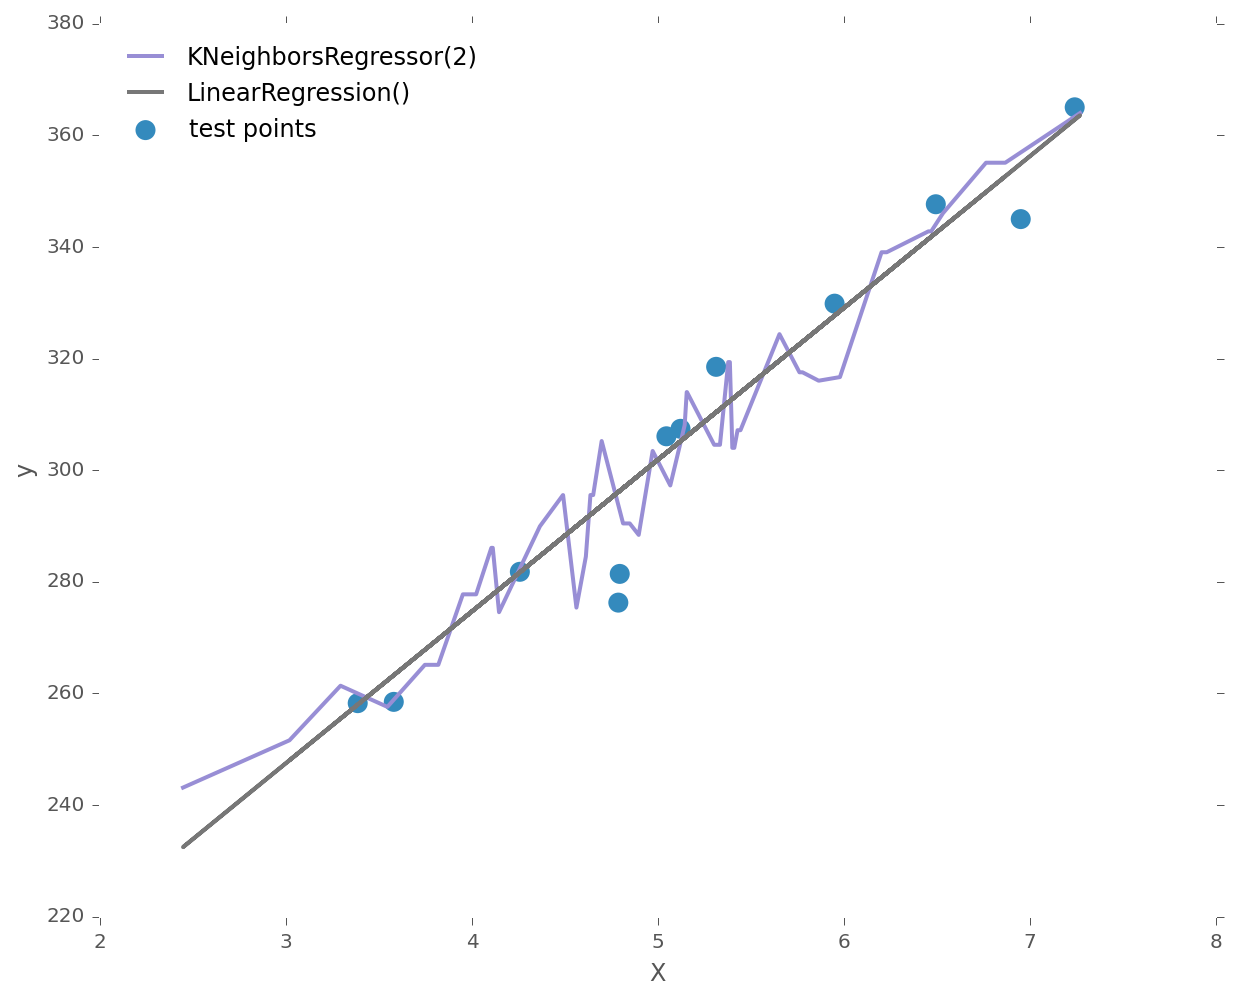

In [17]:
plot()

### Bias-Variance Trade-Off

**Bias**

Refers to the error in our prediction that is introduced by our choice of model.

- e.g. Linear models assume a linear relationship

**Variance**

The amount our prediction will change if we use a different training set.

**Good predictions** 

- will simultaneously minimize bias and variance.
- More flexible methods result in less bias. 

### Trade-off?

Easy to find a low-bias method.

- `KNeighborsRegressor(1)` passes through every point.
- But... high variance when cross validated.

Easy to find a low-variance method.

- A hoizontal line.
- This has very high bias.

**Challange**: find a method that minimizes both

In [19]:
from sklearn.metrics import mean_squared_error

Test function and `PolynomialRegression` taken from [Jake Vanderplas' excellent tutorial](http://nbviewer.ipython.org/github/jakevdp/2013_fall_ASTR599/blob/master/notebooks/18_IntermediateSklearn.ipynb).

In [20]:
def test_func(x, err=0.5):
    y = 10 - 1. / (x + 0.1)
    if err > 0:
        y = np.random.normal(y, err)
    return y

def make_data(N=40, error=1.0, random_seed=1):
    # randomly sample the data
    np.random.seed(1)
    X = np.random.random(N)[:, np.newaxis]
    y = test_func(X.ravel(), error)
    
    return X, y

In [22]:
class PolynomialRegression(LinearRegression):
    """Simple Polynomial Regression to 1D data"""
    def __init__(self, degree=1, **kwargs):
        self.degree = degree
        LinearRegression.__init__(self, **kwargs)
        
    def fit(self, X, y):
        if X.shape[1] != 1:
            raise ValueError("Only 1D data valid here")
        if self.degree > 1:
            Xp = X ** (1 + np.arange(self.degree))
            return LinearRegression.fit(self, Xp, y)
        else:
            return LinearRegression.fit(self, X, y)
         
    def predict(self, X):
        if self.degree > 1:
            Xp = X ** (1 + np.arange(self.degree))
            return LinearRegression.predict(self, Xp)
        else:
            return LinearRegression.predict(self, X)

In [23]:
X_true, y_true = make_data(100, error=0.0)
X, y = make_data(100, error=1.0)
MSE = mean_squared_error(y, y_true)
print MSE

0.815400074255


In [24]:
def plot():
    plt.scatter(X, y, c=colors[0], s=70, alpha=0.75)
    plt.plot(sorted(X_true[:,0]), y_true[np.argsort(X_true[:,0])], 
         color="darkgrey", linewidth=2)
    plt.show()

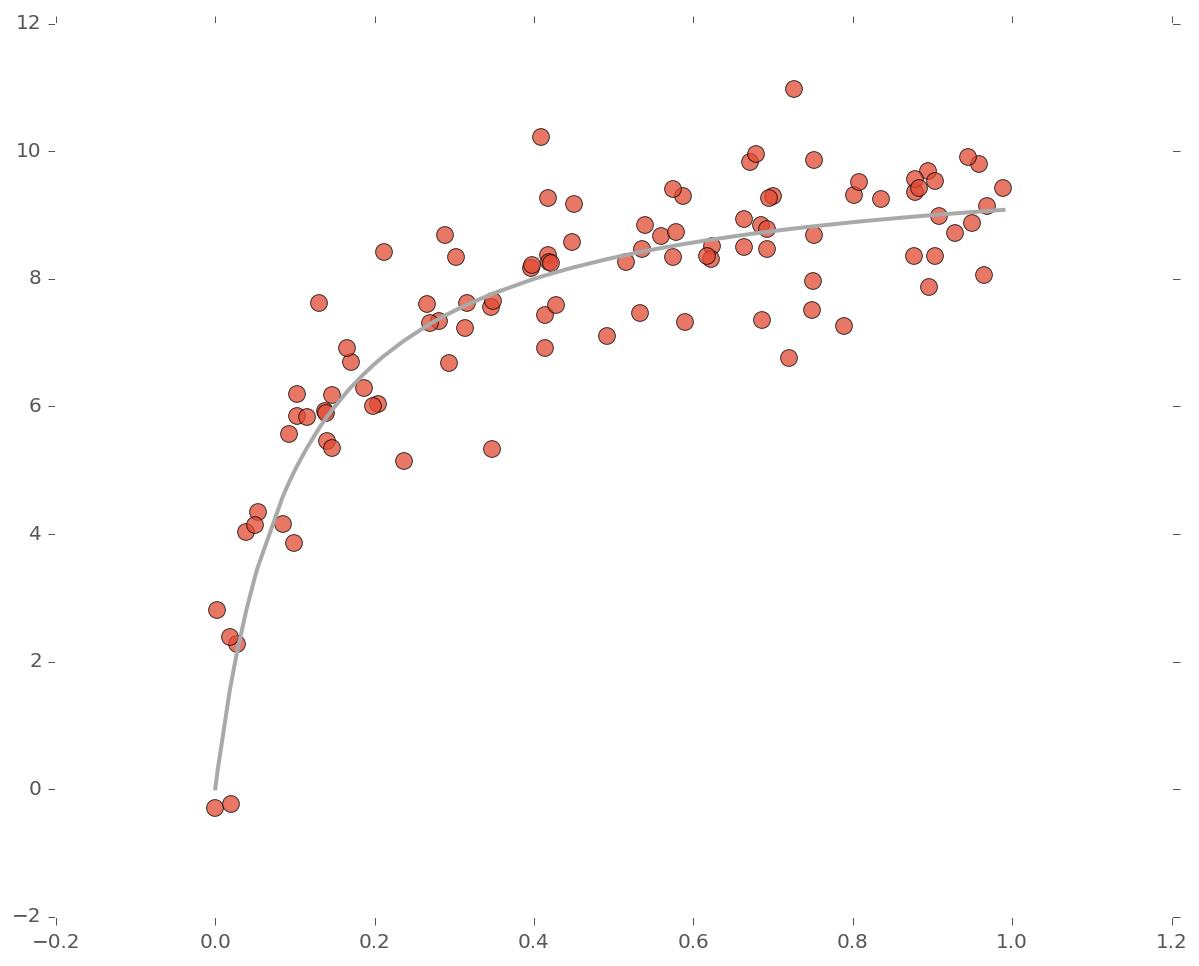

In [25]:
plot()

In [26]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                        test_size=0.2, random_state=0)
test = []
train = []
shape = []
X_tmp = np.linspace(0,1,100)[:, np.newaxis]

In [27]:
degree = range(1,20)
for d in degree:
    model = PolynomialRegression(degree=d)
    model.fit(X_train, y_train)
    test.append(mean_squared_error(model.predict(X_test), y_test))
    train.append(mean_squared_error(model.predict(X_train), y_train))
    shape.append(model.predict(X_tmp))

In [28]:
def plot():
    plt.plot(np.array(degree)/20., test,'-')
    plt.plot(np.array(degree)/20., train,'-')
    plt.hlines(MSE, 0, 1)
    plt.xlabel('increasing flexibility')
    plt.ylabel('MSE')
    plt.show()

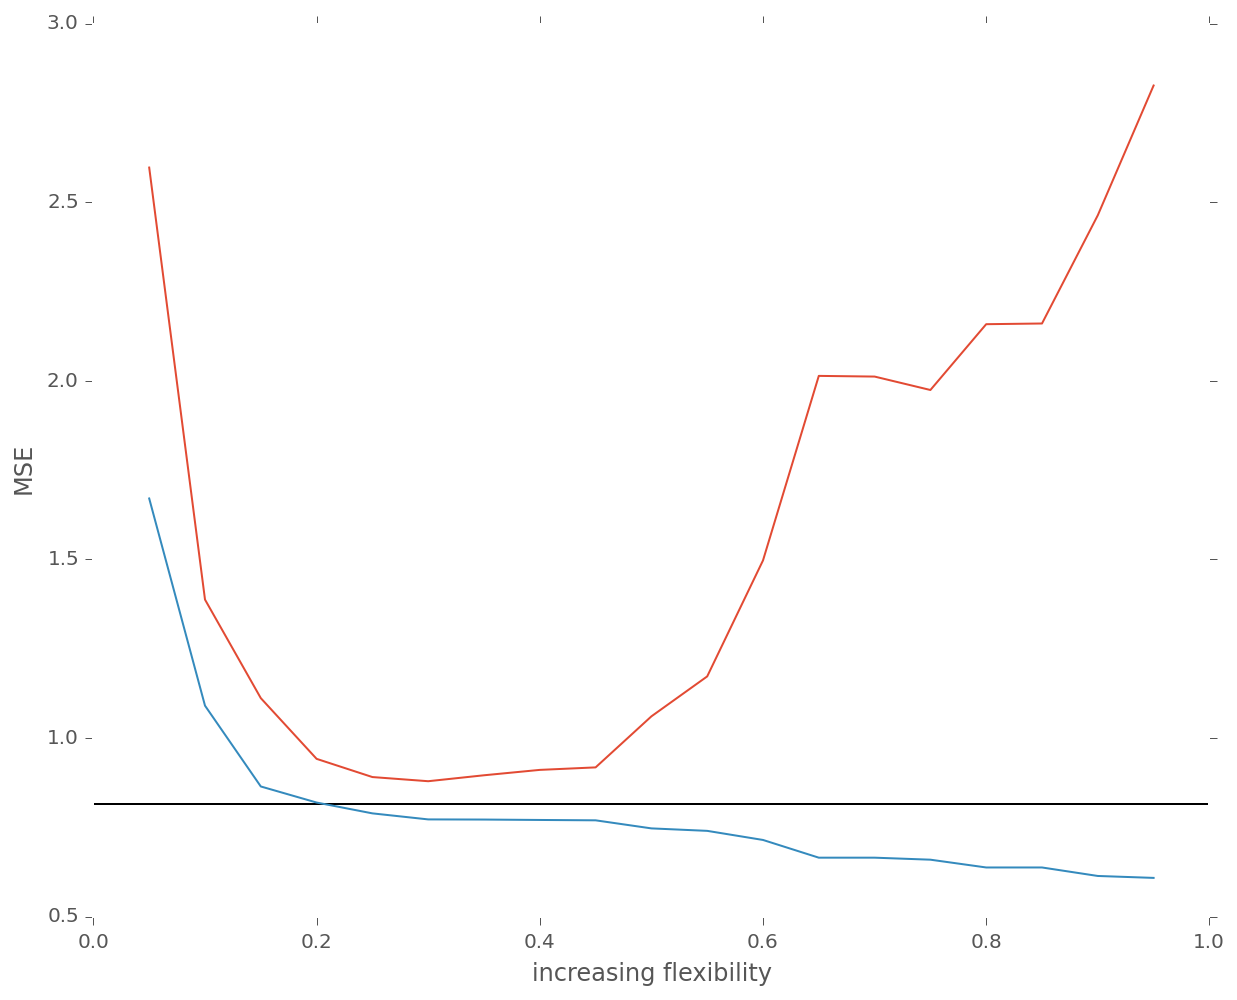

In [29]:
plot()

In [57]:
def plot(index):
    fig, ax = plt.subplots(1,2, figsize=(12,6))

    # Plot showing parameters
    ax[0].plot(np.array(degree)/20., test, linewidth=2, alpha=0.5)
    ax[0].plot(np.array(degree)/20., train,'-', linewidth=2, alpha=0.5)
    ax[0].hlines(MSE, 0, 1, label='MSE {0:0.1f}'.format(MSE))
    ax[0].scatter(degree[index]/20., test[index], 
                  s=50, c=colors[0], label='test MSE {0:0.1f}'.format(test[index]))
    ax[0].scatter(degree[index]/20., train[index], 
                  s=50, c=colors[1], label='train MSE {0:0.1f}'.format(train[index]))
    ax[0].set_xlabel('increasing flexibility')
    ax[0].set_ylabel('MSE')
    ax[0].set_xlim(0,1)
    ax[0].set_ylim(0.5,3.0)
    ax[0].legend(loc='upper center')
    
    ax[1].plot(X_tmp[:,0], shape[index], color='black', linewidth=2, label='fit')
    ax[1].scatter(X_train[:,0], y_train, alpha=0.5, c=colors[0], s=50, label='train')
    ax[1].scatter(X_test[:,0], y_test, alpha=0.5, c=colors[1], s=50, label='test')
    ax[1].set_ylim(-1,12)
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    ax[1].legend(loc='lower right')
    

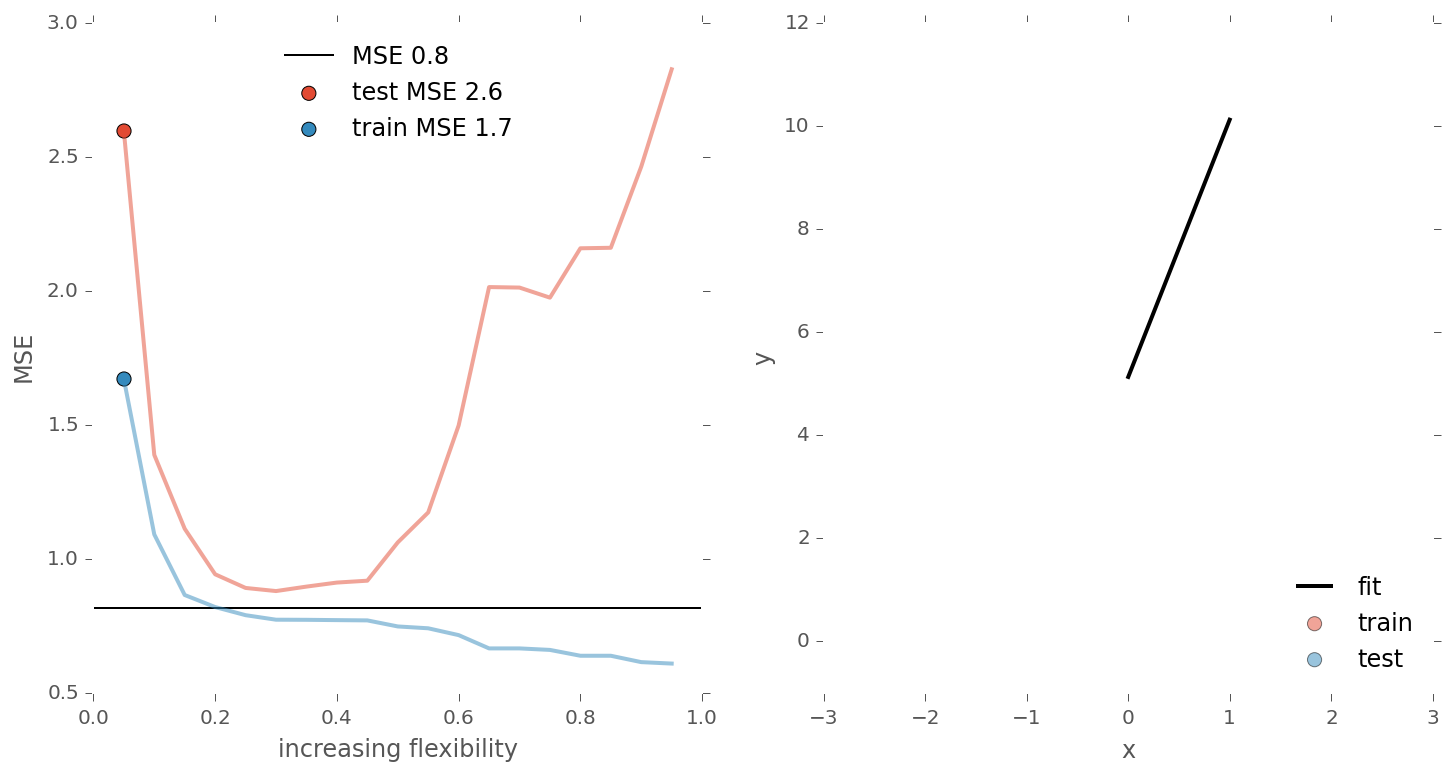

In [58]:
plot(0)

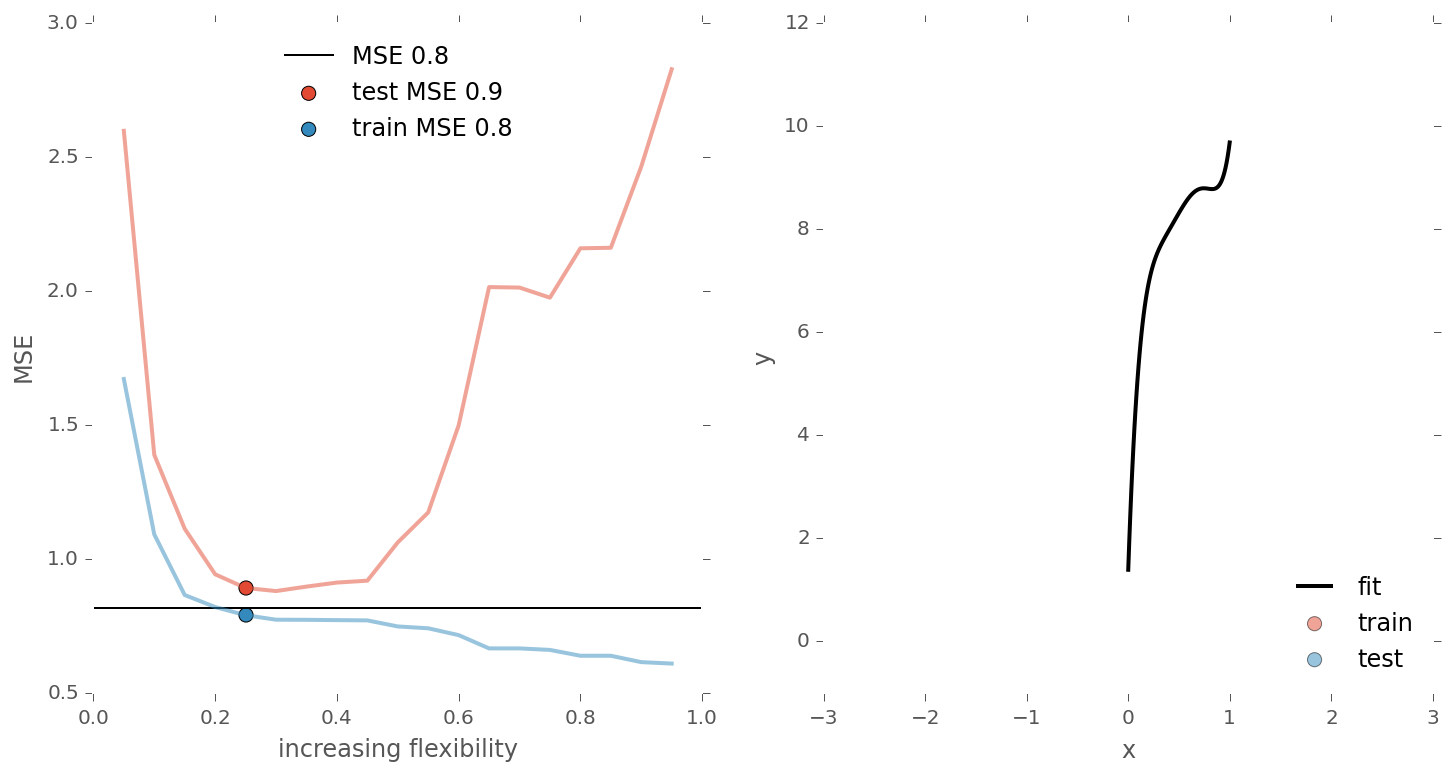

In [59]:
plot(4)

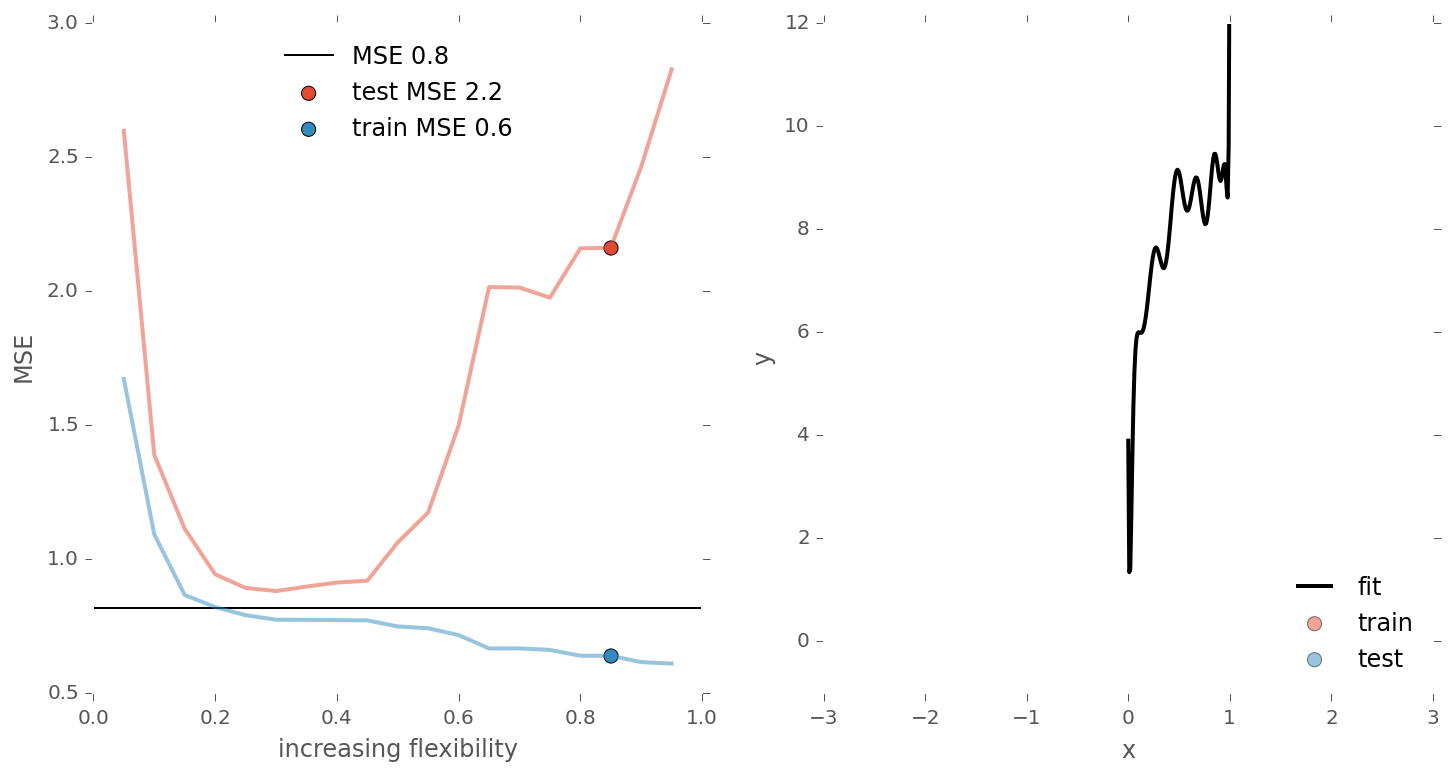

In [60]:
plot(16)

## Regularization

In [61]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [62]:
samples = 100
features = 45
informative = 15
noise = 50

X, y = make_regression( n_samples=samples, 
                        n_features=features, 
                        n_informative=informative,
                        random_state=0, 
                        noise=noise) 

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, 
                                            test_size=0.2, random_state=0)

In [63]:
def plot_curves(alphas, train, test, coefs):
    
    fig, ax = plt.subplots(2,1, figsize=(10,8), sharex=True)
    
    ax[0].plot(alphas, train, label='train')
    ax[0].plot(alphas, test, label='test')
    ax[0].set_xscale('log')
    ax[0].set_ylabel('model.score()')
    ax[0].legend()

    ax[1].plot(alphas, coefs)
    ax[1].set_xscale('log')
    ax[1].set_xlabel('alpha value')
    ax[1].set_ylabel('model.coef_')
    ax[1].legend()
    
    fig.show() 

In [64]:
def plot_results(model):
    tests = []
    n_alphas = 200
    alphas = np.logspace(-2, 3, n_alphas)

    coefs = []
    train = []
    test = []
    for a in alphas:    
        model.set_params(alpha=a)
        model.fit(X_train, y_train)
        coefs.append(model.coef_)
        test.append(model.score(X_test, y_test))
        train.append(model.score(X_train, y_train))

    plot_curves(alphas, train, test, coefs)

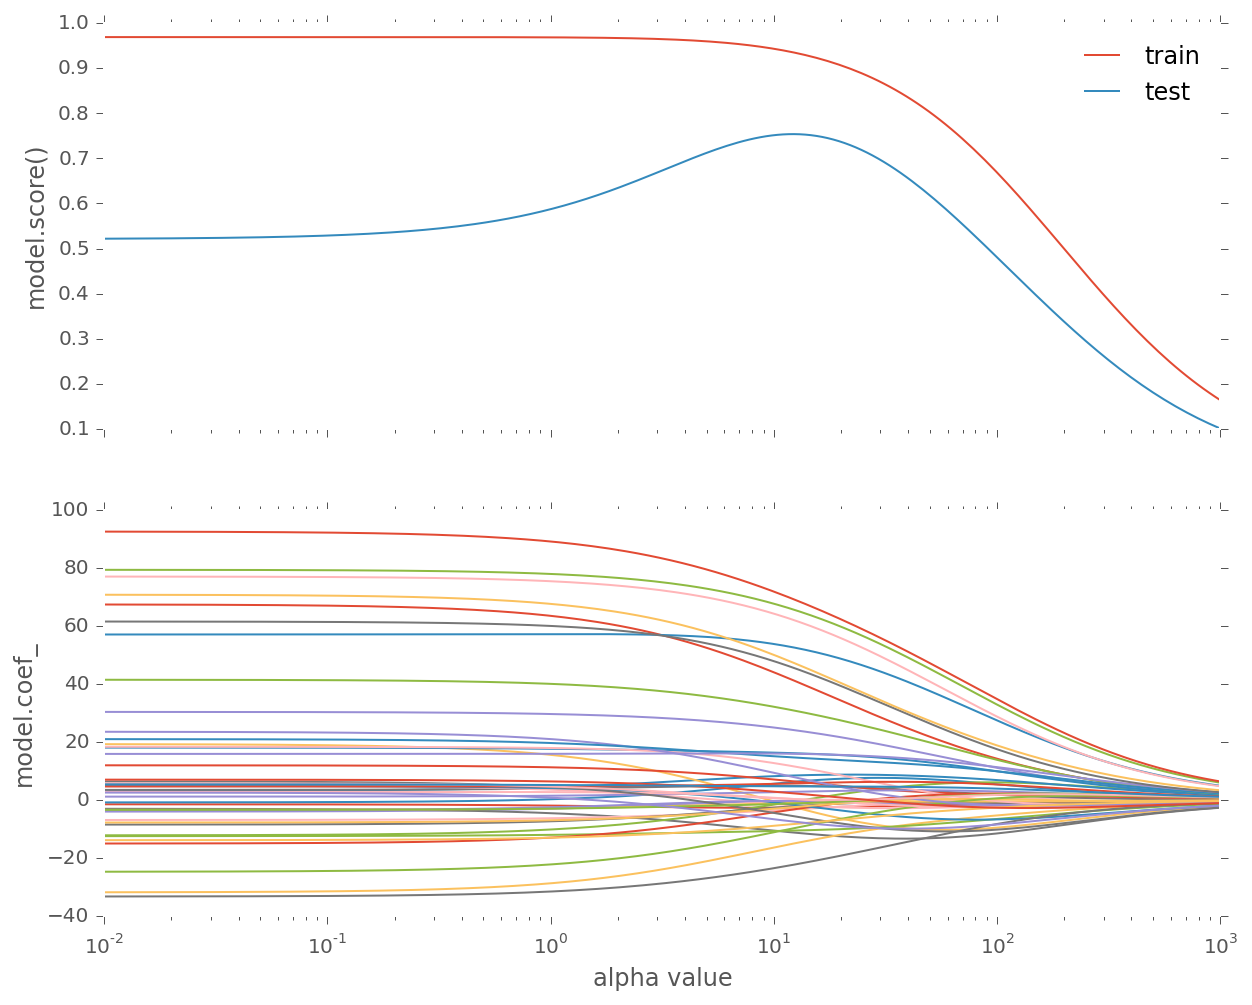

In [65]:
model = Ridge()
plot_results(model)

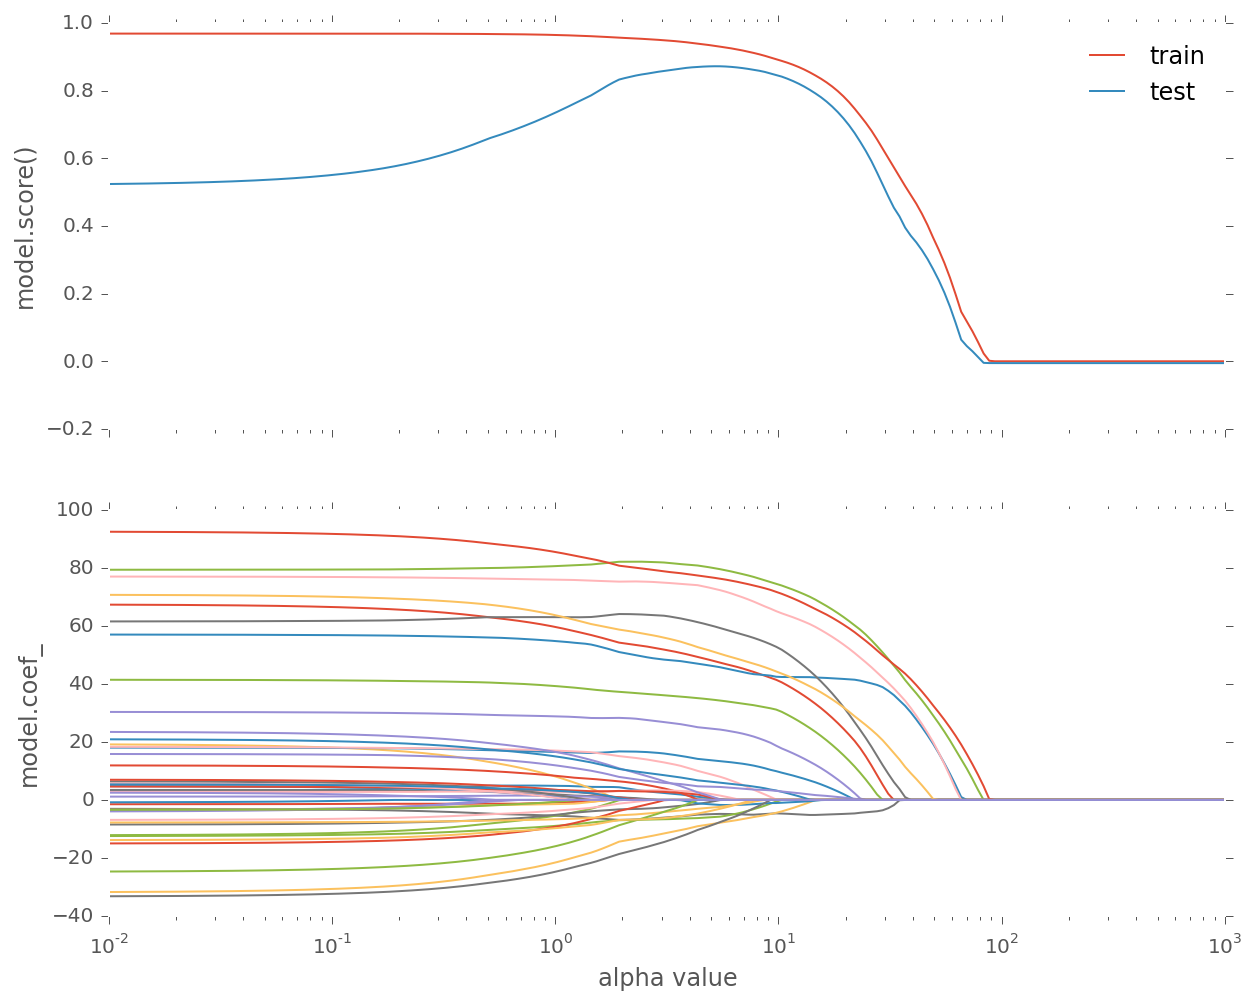

In [66]:
model = Lasso()
plot_results(model)

## Clustering Regularization

In [67]:
from sklearn.datasets import make_circles
from sklearn.neighbors import KNeighborsClassifier

In [68]:
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

def plot_classify(index):
    
    clf = KNeighborsClassifier(index)
    clf.fit(X, y)
    h = 50
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))

    clf.fit(X, y)
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.25, cmap=plt.cm.Greys)
    ax.scatter(X[:, 0], X[:, 1], c=y, s=70, alpha=0.75, edgecolor='none')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('X[:,0]')
    ax.set_ylabel('X[:,1]')
    

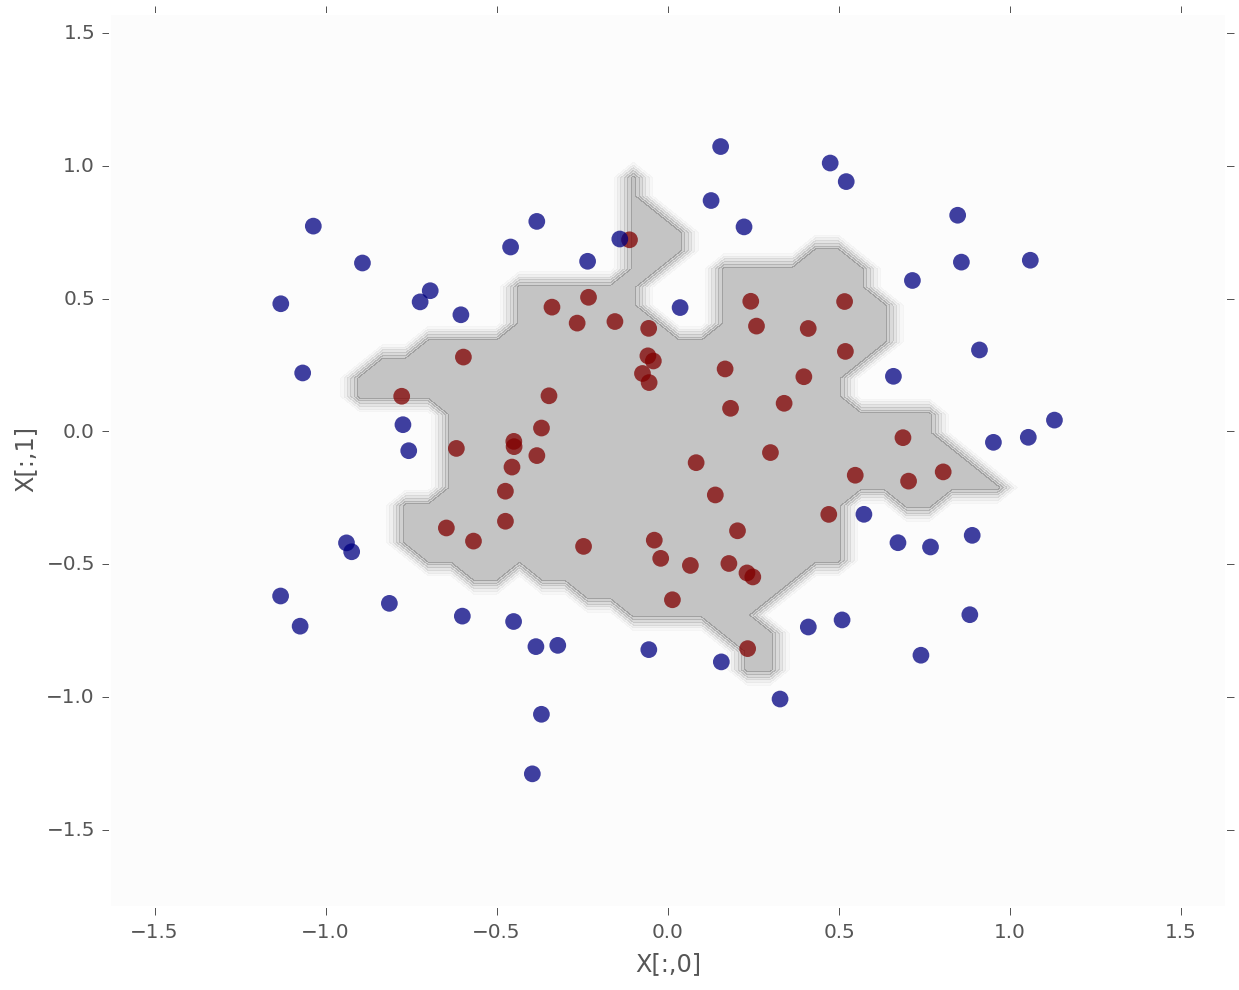

In [70]:
plot_classify(1)

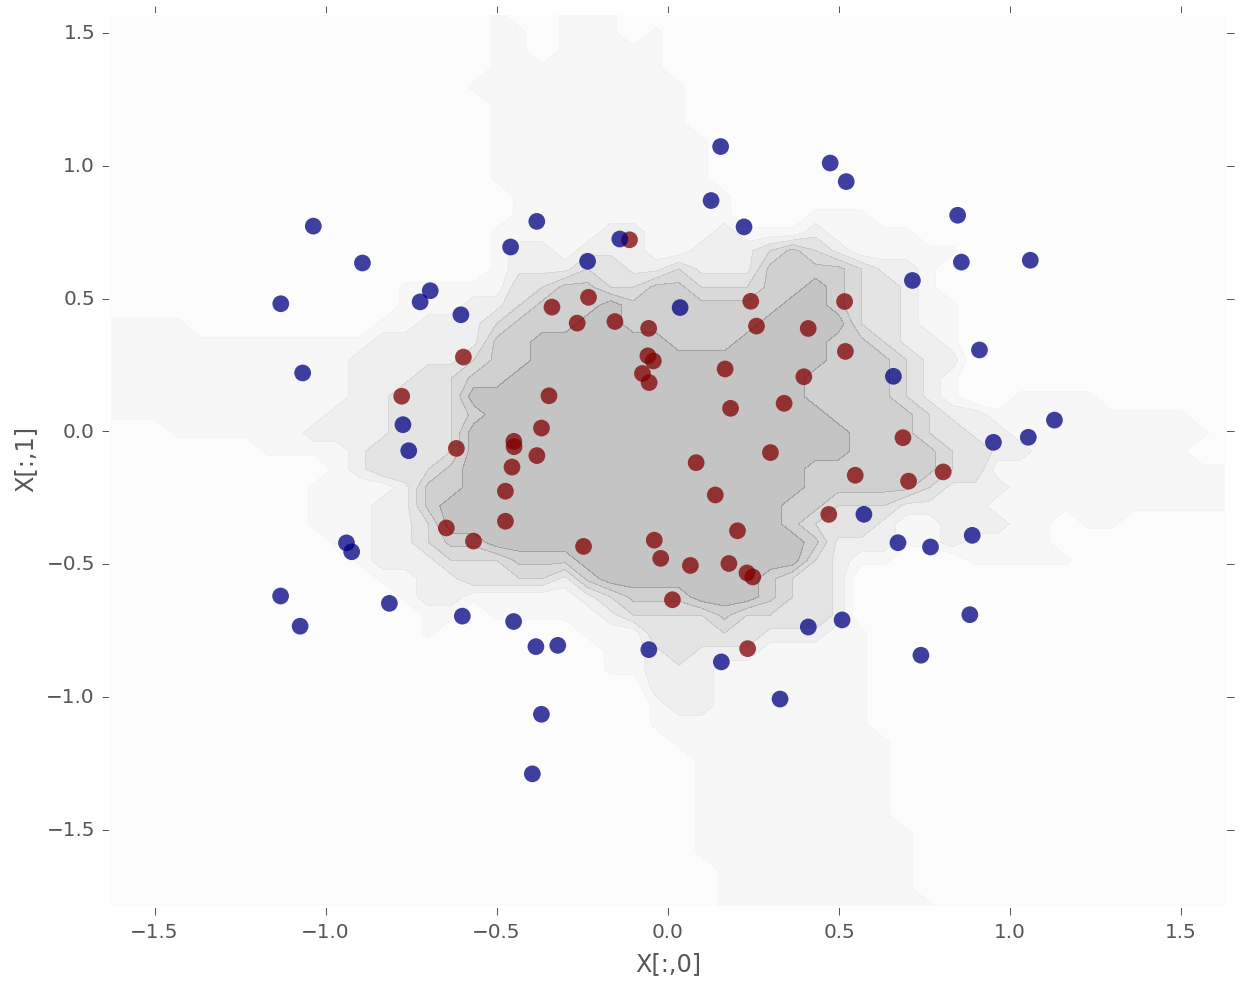

In [71]:
plot_classify(5)

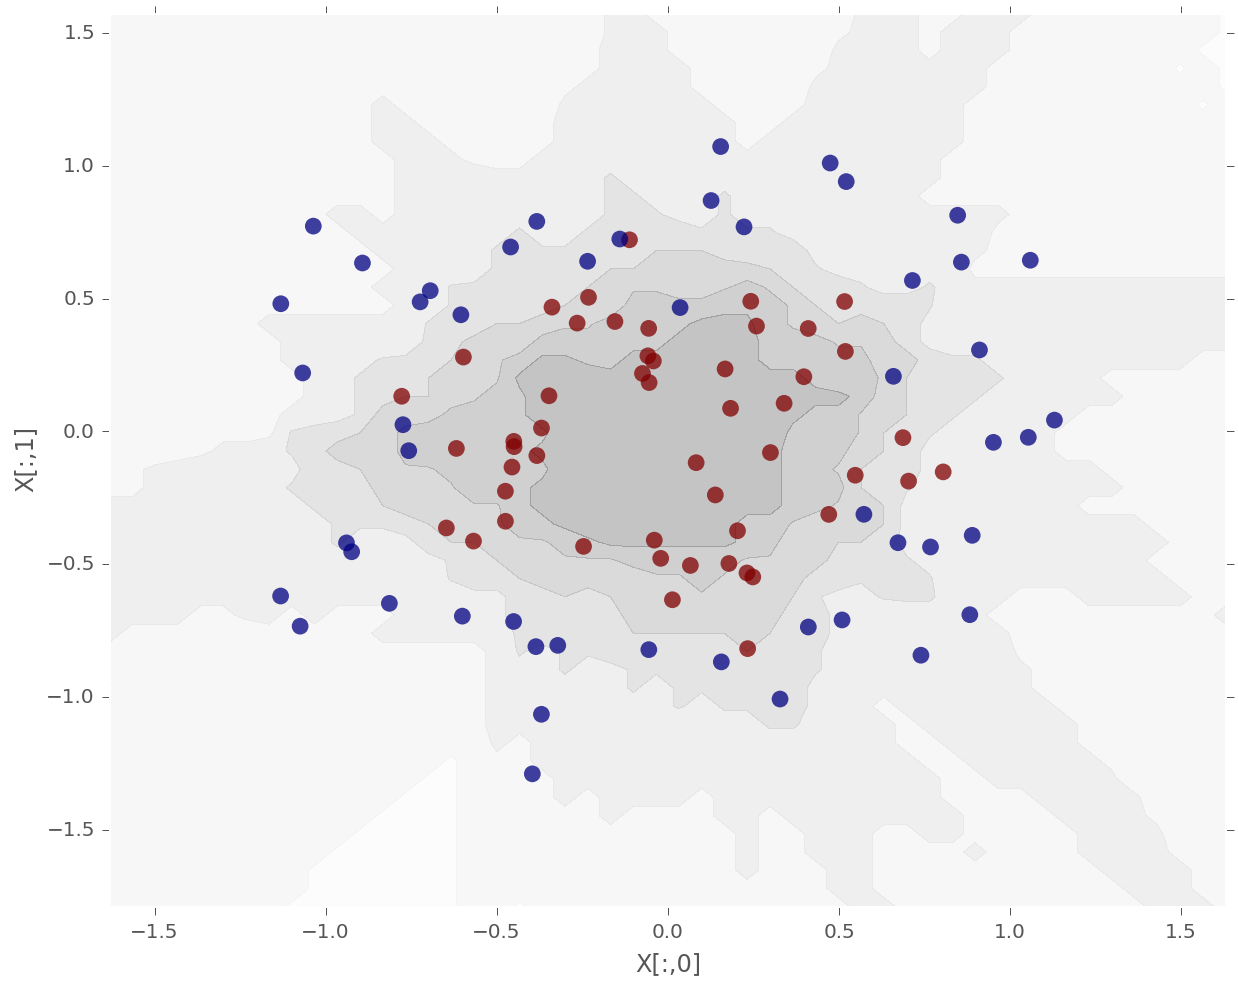

In [72]:
plot_classify(15)